# Introdução

### Pesquisa Nacional por Amostra de Domicílios - PNAD

A Pesquisa Nacional por Amostra de Domicílios - PNAD, de periodicidade anual, foi encerrada em 2016, com a divulgação das informações referentes a 2015. Planejada para produzir resultados para Brasil, Grandes Regiões, Unidades da Federação e nove Regiões Metropolitanas (Belém, Fortaleza, Recife, Salvador, Belo Horizonte, Rio de Janeiro, São Paulo, Curitiba e Porto Alegre), ela pesquisava, de forma permanente, características gerais da população, educação, trabalho, rendimento e habitação, e, com periodicidade variável, outros temas, de acordo com as necessidades de informação para o País, tendo como unidade de investigação o domicílio. A PNAD foi substituída, com metodologia atualizada, pela Pesquisa Nacional por Amostra de Domicílios Contínua - PNAD Contínua,  que propicia uma cobertura territorial mais abrangente e disponibiliza informações conjunturais trimestrais sobre a força de trabalho em âmbito nacional.  

# Importando as bibliotecas de trabalho

In [2]:

import pandas as pd
import numpy as np
from statsmodels.stats.weightstats import ttest_ind, ztest
from scipy.stats import norm
from scipy.stats import t as t_student
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure

sns.set()
%matplotlib inline

In [3]:
    # Dataset
    dataset = 'pnad_2015.csv'
    
    # Imporatndo o Dataset
    df = pd.read_csv(dataset)
    df.head()

,UF,Sexo,Idade,Cor,Anos de Estudo,Renda,Altura
0,11,0,23,8,12,800,1.603808
1,11,1,23,2,12,1150,1.739790
2,11,1,35,8,15,880,1.760444
3,11,0,46,2,6,3500,1.783158
4,11,1,47,8,9,150,1.690631


## Análise exploratória e descritiva

### Comparando as colunas de forma geral

Gráfico com a quatidade de homens e mulheres


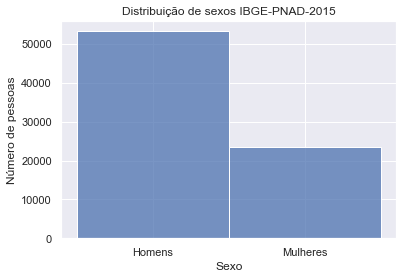

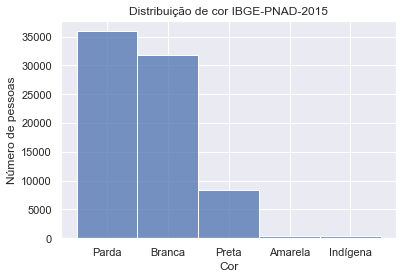

In [4]:
# Gráfico com a quatidade de homens e mulheres
print('Gráfico com a quatidade de homens e mulheres')
graph_sex = sns.histplot(df['Sexo'].map({0:'Homens', 1:'Mulheres'})).set(title = 'Distribuição de sexos IBGE-PNAD-2015', ylabel = 'Número de pessoas')
plt.show()

graph_cor = sns.histplot(df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'})).set(title = 'Distribuição de cor IBGE-PNAD-2015', ylabel = 'Número de pessoas')
plt.show()

### Número de pessoas por Macrorregião e estados

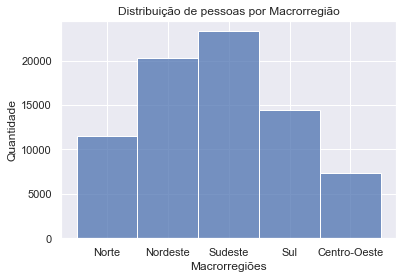

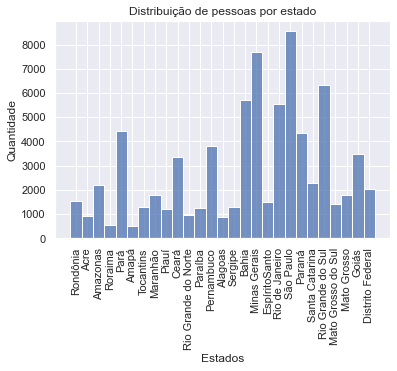

In [5]:
graph_macro_reg = sns.histplot(df['UF'].map({11:'Norte', 12: 'Norte', 13:'Norte', 14:'Norte', 15:'Norte', 16:'Norte', 17:'Norte', 21: 'Nordeste', 22: 'Nordeste', 23: 'Nordeste', 24: 'Nordeste', 25: 'Nordeste', 26: 'Nordeste', 27: 'Nordeste', 28:'Nordeste', 29:'Nordeste', 31:'Sudeste', 32:'Sudeste', 33:'Sudeste', 35:'Sudeste', 41:'Sul', 42:'Sul',43:'Sul', 50:'Sul', 51:'Centro-Oeste', 52:'Centro-Oeste', 53:'Centro-Oeste'})).set(title = 'Distribuição de pessoas por Macrorregião', ylabel = 'Quantidade', xlabel = 'Macrorregiões')
plt.show()

graph_estados = sns.histplot(df['UF'].map({11:'Rondônia', 12: 'Acre', 13:'Amazonas', 14:'Roraima', 15:'Pará', 16:'Amapá', 17:'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'EspíritoSanto', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina',43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás', 53:'Distrito Federal'})).set(title = 'Distribuição de pessoas por estado', ylabel = 'Quantidade', xlabel = 'Estados')
plt.xticks(rotation=90)
plt.show()

### Distribuição das idades

Analisando a distribuição das idades notamos uma similaridade visual com a distribuição normal, sendo novamente visualmente simétrica.

Calculando sua média, moda e mediana torna possível determinar a simetria da distribuição.

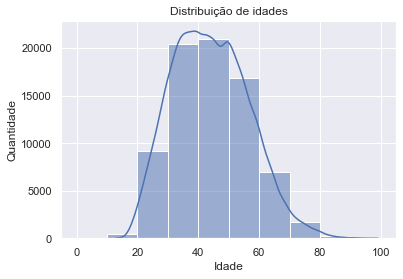

In [6]:
graph_idades = sns.histplot(df['Idade'], bins = [0,10,20,30,40,50,60,70,80,90,100], kde = True).set(title = 'Distribuição de idades', ylabel = 'Quantidade')
plt.show()

In [7]:
idade_media_br = df['Idade'].mean()
idade_media_homens = df.query('Sexo == 0')['Idade'].mean()
idade_media_mulheres = df.query('Sexo == 1')['Idade'].mean()

idade_mediana_br = df['Idade'].median()
idade_mediana_homens = df.query('Sexo == 0')['Idade'].median()
idade_mediana_mulheres = df.query('Sexo == 1')['Idade'].median()

idade_moda_br = df['Idade'].mode()
idade_moda_homens = df.query('Sexo == 0')['Idade'].mode()
idade_moda_mulheres = df.query('Sexo == 1')['Idade'].mode()

print(f'''
Idade média da população brasileira: {idade_media_br}
Idade média dos homens brasileiros: {idade_media_homens}
Idade média das mulheres brasileiras: {idade_media_mulheres}

Mediana da idade da população brasileira: {idade_mediana_br}
Mediana da idade dos homens brasileiros: {idade_mediana_homens}
Mediana da idade das mulheres brasileiras: {idade_mediana_mulheres}

Moda da idade da população brasileira: {idade_moda_br[0]}
Moda da idade dos homens brasileiros: {idade_moda_homens[0]}
Moda da idade das mulheres brasileiras: {idade_moda_mulheres[0]}
''')


Idade média da população brasileira: 44.07142113482561
Idade média dos homens brasileiros: 44.04655399061033
Idade média das mulheres brasileiras: 44.127554048325564

Mediana da idade da população brasileira: 43.0
Mediana da idade dos homens brasileiros: 43.0
Mediana da idade das mulheres brasileiras: 44.0

Moda da idade da população brasileira: 40
Moda da idade dos homens brasileiros: 40
Moda da idade das mulheres brasileiras: 50



Com esses valores determinados basta comparar qual o maior para determinar a simetria da distribuição:

Idade Média:
$\begin{cases}
\bar{x}_{Br} = 44.07\\
\bar{x}_M = 44.12\\
\bar{x}_H = 44.04
\end{cases}
$

Mediana da Idade:
$\begin{cases}
m_{Br} = 43\\
m_M = 43\\
m_H = 44
\end{cases}
$

Moda da Idade:
$\begin{cases}
m_{Br} = 40\\
m_M = 50\\
m_H = 40
\end{cases}
$


A partir destes resultados notamos que a média e a mediana estão bem próximas, que se aproximam da moda dessa análise. Sendo rigoroso temos que $\bar{x}_{Br} > m_{Br} > m_{Br}$ e, portanto temos uma distribuição ligeiramente assimétria à direita.
No entanto, podemos considerar essa distribuição como se fosse simétrica pois embora seja assimétrica à direita, sua assimetria é pequena. Além de simétrica, essa distribuição se parece bastante com uma distribuição normal. Logo nossa distribuição é parecida com uma distribuição simétrica.

Além disso, podemos ver visualmente, a linha de distribuição muito semelhança à normal, sendo um pouco menos suave, talvez por conta do número de dados.

### Distribuição dos Anos de Estudo

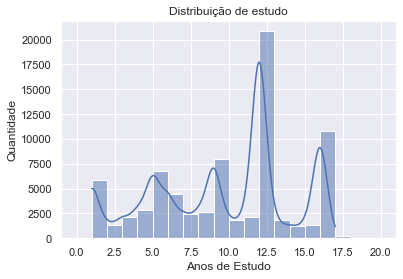

In [8]:
graph_anos_de_estudo = sns.histplot(df['Anos de Estudo'], bins = [y for y in range(21)], kde = True).set(title = 'Distribuição de estudo', ylabel = 'Quantidade')
plt.show()

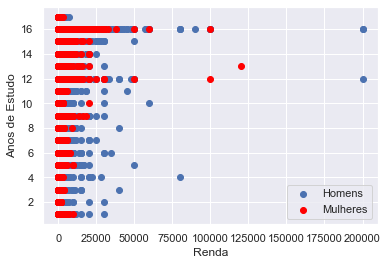

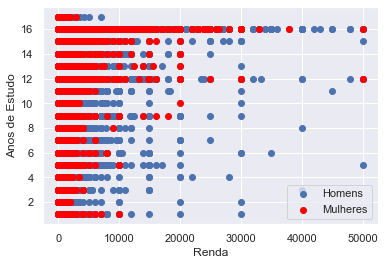

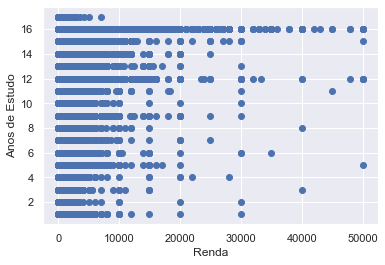

In [9]:
Renda_corte = '50000'

plt.scatter(df.query('Sexo == 0')['Renda'], df.query('Sexo == 0')['Anos de Estudo'])
plt.scatter(df.query('Sexo == 1')['Renda'], df.query('Sexo == 1')['Anos de Estudo'], color = 'red')
plt.legend(['Homens','Mulheres'])
plt.ylabel('Anos de Estudo')
plt.xlabel('Renda')
plt.show()

plt.scatter(df.query('Sexo == 0 and Renda <= ' + Renda_corte)['Renda'], df.query('Sexo == 0 and Renda <= ' + Renda_corte)['Anos de Estudo'])
plt.scatter(df.query('Sexo == 1 and Renda <= ' + Renda_corte)['Renda'], df.query('Sexo == 1 and Renda <= ' + Renda_corte)['Anos de Estudo'], color = 'red')
plt.legend(['Homens','Mulheres'])
plt.ylabel('Anos de Estudo')
plt.xlabel('Renda')
plt.show()

plt.scatter(df.query('Renda <= ' + Renda_corte)['Renda'], df.query('Renda <= ' + Renda_corte)['Anos de Estudo'])
plt.ylabel('Anos de Estudo')
plt.xlabel('Renda')
plt.show()


#### Anos de Estudo x Renda Média

### Distribuição da Renda

A renda é uma variável contínua e para visualizar sua distribuição melhor utilizei um plot na forma de histograma para permitir ver a distribuição da renda brasileira geral, masculina e feminina na forma de barras e no boxplot para visualizar a densidade dos dados.

Analisando a distribuição de renda podemos notar visualmente a diferença de renda entre homens e mulheres apresentada pela amostra. Para ter está visão mais nítida basta olhar os gráficos Boxplot das distribuições de renda masculina e feminina.

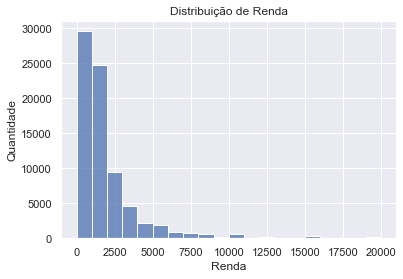

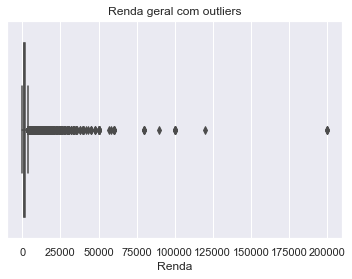

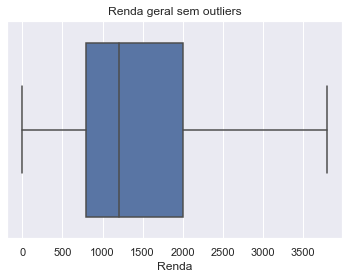

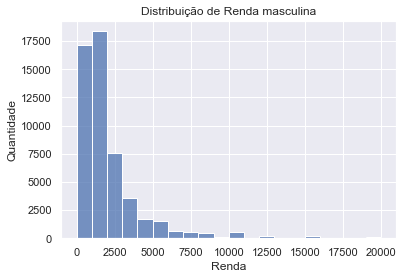

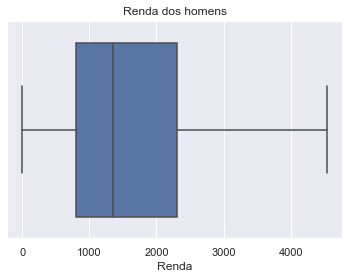

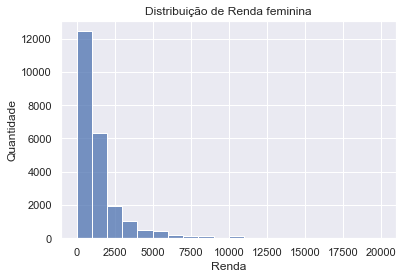

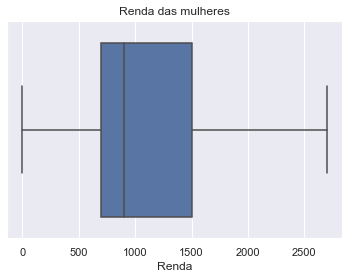

In [10]:
graph_renda = sns.histplot(df['Renda'], bins = [i*1000 for i in range(21)]).set(title = 'Distribuição de Renda', ylabel = 'Quantidade')
plt.show()
sns.boxplot(x = df['Renda']).set(title = 'Renda geral com outliers')
plt.show()
sns.boxplot(x = df['Renda'], showfliers = False).set(title = 'Renda geral sem outliers')
plt.show()

graph_renda = sns.histplot(df.query('Sexo == 0')['Renda'], bins = [i*1000 for i in range(21)]).set(title = 'Distribuição de Renda masculina', ylabel = 'Quantidade')
plt.show()
sns.boxplot(x = df.query('Sexo == 0')['Renda'], showfliers = False).set(title = 'Renda dos homens')
plt.show()

graph_renda = sns.histplot(df.query('Sexo == 1')['Renda'], bins = [i*1000 for i in range(21)]).set(title = 'Distribuição de Renda feminina', ylabel = 'Quantidade')
plt.show()
sns.boxplot(x = df.query('Sexo == 1')['Renda'], showfliers = False).set(title = 'Renda das mulheres')
plt.show()

In [11]:
renda_media_br = df['Renda'].mean()
renda_media_homens = df.query('Sexo == 0')['Renda'].mean()
renda_media_mulheres = df.query('Sexo == 1')['Renda'].mean()

renda_mediana_br = df['Renda'].median()
renda_mediana_homens = df.query('Sexo == 0')['Renda'].median()
renda_mediana_mulheres = df.query('Sexo == 1')['Renda'].median()

renda_moda_br = df['Renda'].mode()
renda_moda_homens = df.query('Sexo == 0')['Renda'].mode()
renda_moda_mulheres = df.query('Sexo == 1')['Renda'].mode()

print(f'''
Renda média da população brasileira: {renda_media_br}
Renda média dos homens brasileiros: {renda_media_homens}
Renda média das mulheres brasileiras: {renda_media_mulheres}

Mediana da renda da população brasileira: {renda_mediana_homens}
Mediana da renda dos homens brasileiros: {renda_mediana_homens}
Mediana da renda das mulheres brasileiras: {renda_mediana_mulheres}

Moda da renda da população brasileira: {renda_moda_br[0]}
Moda da renda dos homens brasileiros: {renda_moda_homens[0]}
Moda da renda das mulheres brasileiras: {renda_moda_mulheres[0]}
''')


Renda média da população brasileira: 2000.3831988547631
Renda média dos homens brasileiros: 2192.4415962441312
Renda média das mulheres brasileiras: 1566.84739296312

Mediana da renda da população brasileira: 1350.0
Mediana da renda dos homens brasileiros: 1350.0
Mediana da renda das mulheres brasileiras: 900.0

Moda da renda da população brasileira: 788
Moda da renda dos homens brasileiros: 788
Moda da renda das mulheres brasileiras: 788



Notamos que a moda é o salário mínimo, o que infelizmente quer dizer que o valor de salário mais recebido pelas pessoas da amostra é 1 salário mínimo. Além disso, calculamos e visualizamos a diferença das rendas médias entre os homens e as mulheres. A partir desta amostra pode-se pensar que os homens relamente ganham mais do que as mulheres, mas não de maneira amostral, mas sim populacional, sendo algo geral para o Brasil como um todo. Considerando tal afirmação para a população brasileira como um todo. Esse raciocínio será elaborado mais abaixo.

### Analisando por Macrorregião

### Analisando por Cor

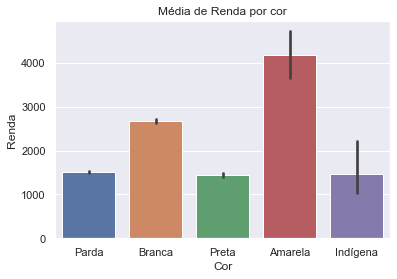

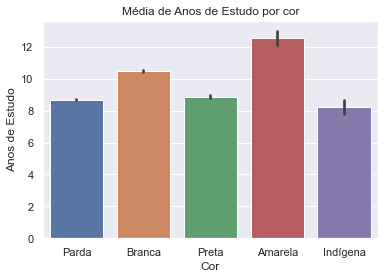

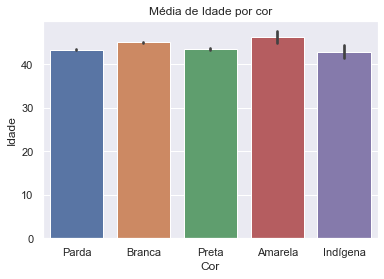

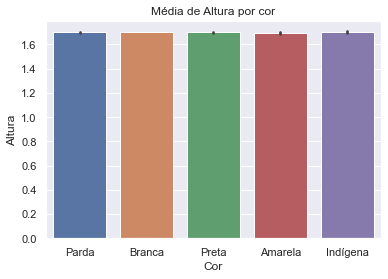

In [12]:
sns.barplot(data = df, x = df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}), y = df['Renda']).set(title = 'Média de Renda por cor')
plt.show()

sns.barplot(data = df, x = df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}), y = df['Anos de Estudo']).set(title = 'Média de Anos de Estudo por cor')
plt.show()

sns.barplot(data = df, x = df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}), y = df['Idade']).set(title = 'Média de Idade por cor')
plt.show()

sns.barplot(data = df, x = df['Cor'].map({0:'Indígena', 2:'Branca', 4:'Preta', 6:'Amarela', 8:'Parda', 9:'Sem declaração'}), y = df['Altura']).set(title = 'Média de Altura por cor')
plt.show()

### Analisando por Sexo

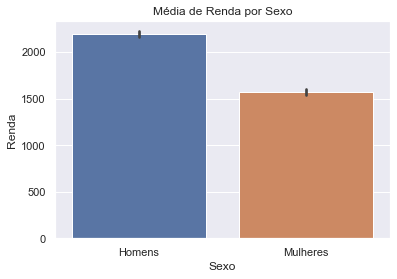

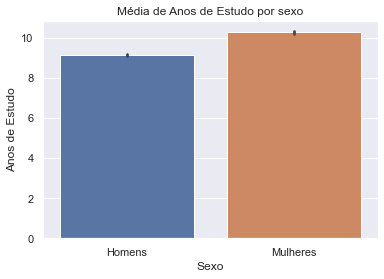

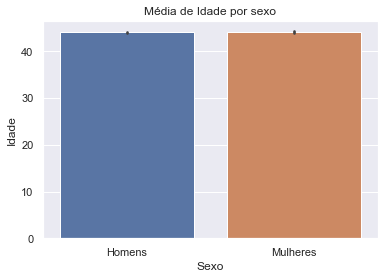

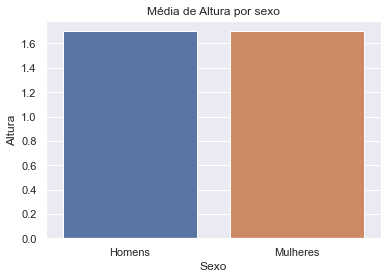

In [13]:
sns.barplot(data = df, x = df['Sexo'].map({0:'Homens', 1:'Mulheres'}), y = df['Renda']).set(title = 'Média de Renda por Sexo')
plt.show()

sns.barplot(data = df, x = df['Sexo'].map({0:'Homens', 1:'Mulheres'}), y = df['Anos de Estudo']).set(title = 'Média de Anos de Estudo por sexo')
plt.show()

sns.barplot(data = df, x = df['Sexo'].map({0:'Homens', 1:'Mulheres'}), y = df['Idade']).set(title = 'Média de Idade por sexo')
plt.show()

sns.barplot(data = df, x = df['Sexo'].map({0:'Homens', 1:'Mulheres'}), y = df['Altura']).set(title = 'Média de Altura por sexo')
plt.show()

#### Média de Renda por estado

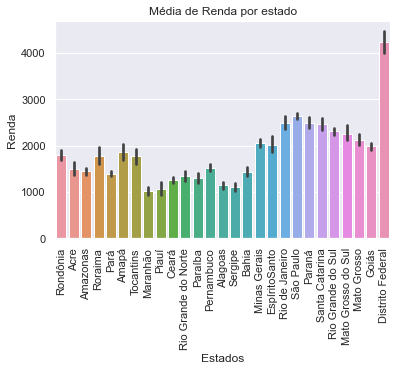

<Figure size 720x864 with 0 Axes>

In [14]:
fig = sns.barplot(data = df, x = df['UF'].map({11:'Rondônia', 12: 'Acre', 13:'Amazonas', 14:'Roraima', 15:'Pará', 16:'Amapá', 17:'Tocantins', 21: 'Maranhão', 22: 'Piauí', 23: 'Ceará', 24: 'Rio Grande do Norte', 25: 'Paraíba', 26: 'Pernambuco', 27: 'Alagoas', 28:'Sergipe', 29:'Bahia', 31:'Minas Gerais', 32:'EspíritoSanto', 33:'Rio de Janeiro', 35:'São Paulo', 41:'Paraná', 42:'Santa Catarina',43:'Rio Grande do Sul', 50:'Mato Grosso do Sul', 51:'Mato Grosso', 52:'Goiás', 53:'Distrito Federal'}), y = df['Renda']).set(title = 'Média de Renda por estado', xlabel = 'Estados')
plt.xticks(rotation=90)
plt.figure(figsize = (10,12))
plt.savefig('teste123.pdf', dpi = 'figure')
plt.show()

#### Média de Anos de Estudo por estado

### Distribuição das Alturas

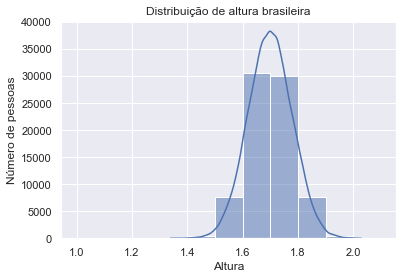

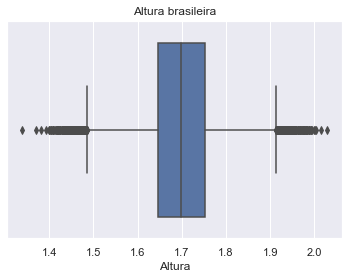

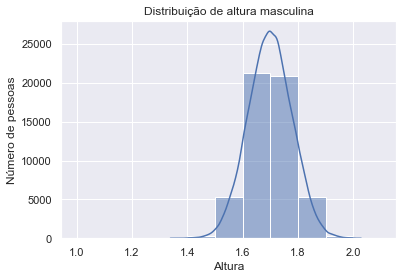

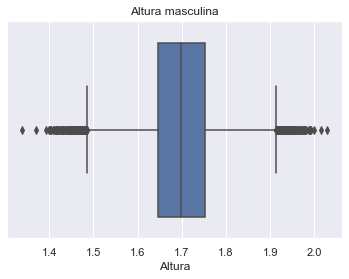

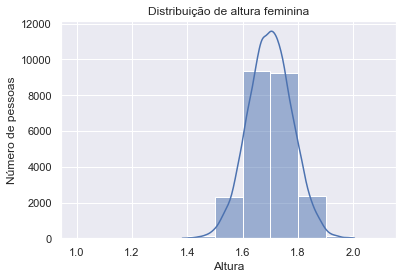

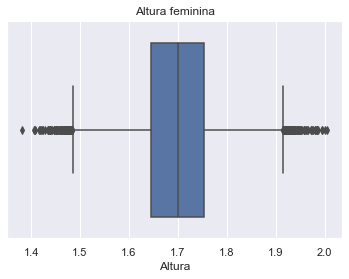

In [15]:
sns.histplot(df['Altura'], bins = [1 + 0.1 * i for i in range(12)], kde = True).set(title = 'Distribuição de altura brasileira', ylabel = 'Número de pessoas')
plt.show()
sns.boxplot(x = df['Altura']).set(title = 'Altura brasileira')
plt.show()

sns.histplot(df.query('Sexo == 0')['Altura'], bins = [1 + 0.1 * i for i in range(12)], kde = True).set(title = 'Distribuição de altura masculina', ylabel = 'Número de pessoas')
plt.show()
sns.boxplot(x = df.query('Sexo == 0')['Altura']).set(title = 'Altura masculina')
plt.show()

sns.histplot(df.query('Sexo == 1')['Altura'], bins = [1 + 0.1 * i  for i in range(12)], kde = True).set(title = 'Distribuição de altura feminina', ylabel = 'Número de pessoas')
plt.show()
sns.boxplot(x = df.query('Sexo == 1')['Altura']).set(title = 'Altura feminina')
plt.show()

A distribuição da variável das alturas comporta-se como uma normal, como pode ser visto nos histogramas acima.

In [160]:
Altura_media_br = df['Altura'].mean()
Altura_media_homens = df.query('Sexo == 0')['Altura'].mean()
Altura_media_mulheres = df.query('Sexo == 1')['Altura'].mean()

Altura_mediana_br = df['Altura'].median()
Altura_mediana_homens = df.query('Sexo == 0')['Altura'].median()
Altura_mediana_mulheres = df.query('Sexo == 1')['Altura'].median()

Altura_moda_br = df['Altura'].mode()
Altura_moda_homens = df.query('Sexo == 0')['Altura'].mode()
Altura_moda_mulheres = df.query('Sexo == 1')['Altura'].mode()

print(f'''
Altura média da população brasileira: {Altura_media_br}
Altura média dos homens brasileiros: {Altura_media_homens}
Altura média das mulheres brasileiras: {Altura_media_mulheres}

Mediana da altura da população brasileira: {Altura_mediana_homens}
Mediana da altura dos homens brasileiros: {Altura_mediana_homens}
Mediana da altura das mulheres brasileiras: {Altura_mediana_mulheres}

Moda da altura da população brasileira: {Altura_moda_br[0]}
Moda da altura dos homens brasileiros: {Altura_moda_homens[0]}
Moda da altura das mulheres brasileiras: {Altura_moda_mulheres[0]}
''')


Altura média da população brasileira: 1.6995124540575812
Altura média dos homens brasileiros: 1.6994426767322175
Altura média das mulheres brasileiras: 1.6996699632807974

Mediana da altura da população brasileira: 1.6992492485000001
Mediana da altura dos homens brasileiros: 1.6992492485000001
Mediana da altura das mulheres brasileiras: 1.6995726235

Moda da altura da população brasileira: 1.56812756
Moda da altura dos homens brasileiros: 1.671224912
Moda da altura das mulheres brasileiras: 1.56812756



Parece haver algo estranho com relação as alturas das garotas, a média de altura das mulheres está maior que a média masculina, o que sabemos ser errado. Comparando com dados de outras pesquisas do IBGE temos:
> Altura Esperada

> Homens	173.3 cm (5' 8.25'')	

> Mulheres 161,1 cm (5' 3.5'')

A partir disto a média amostral brasileira da altura está próxima do seu valor populacional, no entanto, a média amostral da altura feminina está bem distante do seu valor populacional.


## Análise dos dados

In [49]:
cores = (list(set(df['Cor'])))

df_adapt = df.copy()
tabela1 = pd.crosstab(df['Renda'] ,df_adapt['Cor'].map({0:'Indígena',2:'Branca',4:'Preta',6:'Amarela',8:'Parda'}))

freq_salario = pd.DataFrame()
freq_salario['Absoluta'] = pd.cut(df['Renda'], bins = [i*1000 for i in range(20)]).value_counts()

# por cor
freq_salario2 = pd.DataFrame()
freq_salario2 = pd.cut(df.query('Cor == 2')['Renda'], bins = [i*1000 for i in range(20)]).value_counts()

rendas = dict()
estudos = dict()

for cor in cores:
    estudo_medio = df[df.Cor == int(cor)]['Anos de Estudo'].mean()
    
    rendas[cor] = renda_media
    estudos[cor] = estudo_medio

print(estudos)
rendas

{0: 8.224089635854341, 2: 10.49030331604589, 4: 8.861518293409606, 6: 12.556818181818182, 8: 8.689965205288797}


{0: 1513.596102992345,
 2: 1513.596102992345,
 4: 1513.596102992345,
 6: 1513.596102992345,
 8: 1513.596102992345}

In [46]:
freq_salario2

(1000, 2000]      10926
(0, 1000]          9155
(2000, 3000]       4155
(3000, 4000]       1994
(4000, 5000]       1448
(5000, 6000]        661
(7000, 8000]        485
(9000, 10000]       485
(6000, 7000]        459
(14000, 15000]      220
(11000, 12000]      155
(8000, 9000]        150
(10000, 11000]       71
(15000, 16000]       62
(13000, 14000]       52
(12000, 13000]       48
(17000, 18000]       39
(16000, 17000]       28
(18000, 19000]       14
Name: Renda, dtype: int64

## Inferências à população brasileira

## Cálculo de parâmetros

In [39]:
n_M, n_H = 500, 500

significancia = 0.01
confianca = 1 - significancia

n = n_M + n_H

amostra_H = df[df.Sexo == 0]['Renda'].sample(n = n_H, random_state = 1)
amostra_M = df[df.Sexo == 1]['Renda'].sample(n = n_M, random_state = 1)

media_H = amostra_H.mean()
media_M = amostra_M.mean()

media_pop_H = df[df.Sexo == 0]['Renda'].mean()
media_pop_M = df[df.Sexo == 1]['Renda'].mean()

desvio_H = amostra_H.std()
desvio_M = amostra_M.std()

## Formulando algumas hipóteses para o problema


> Teste Bicaudal

> $H_0$: A Média salarial dos homens é igual a média salarial das mulheres

> $H_1$ As médias são diferentes

$\begin{cases}
H_0: \mu_M = \mu_H \\
H_1: \mu_M \neq \mu_H
\end{cases}
$

> Sendo $H_0$ a hipótese nula e $H_1$ a hipótese alternativa


## Realizando teste da hipótese nula

Testando as hipóteses

> Teste Bicaudal

> 1. Rejeita-se $H_0$ se $z \leq -z{\alpha / 2}$ ou se $z \geq z_{\alpha / 2}$ 
> 2. Rejeita-se $H_0$ se o valor de $p <\alpha$

In [11]:
# Z_alpha para bicaudal

probabilidade = confianca + significancia / 2

z_alpha = norm.ppf(probabilidade)

z_alpha2 = norm.ppf(1 - probabilidade)
z_alpha

2.5758293035489004

In [12]:
# Ztest
graus_de_liberdade = n = 500

# Two-sided -> Bicaudal
z, p = ztest(amostra_H, amostra_M, alternative = 'two-sided')
print (f'z = {z} e p = {p}')

t = t_student.ppf(probabilidade, graus_de_liberdade)
print (f't = {t}')

z = 3.323321032265407 e p = 0.0008895248005648503
t = 2.5856978351416706


### Testando 1 e 2

In [16]:
if z >= z_alpha or z <= z_alpha2: # Teste 1
    print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')
else:
    if p < significancia: # Teste 2
        print(f'A hipótese nula está correta com {confianca:.0%} de confiança.')
    else:
        print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')

A hipótese alternativa está correta com 99% de confiança.


Dessa maneira, nossa hipótese nula aparenta estar correta com uma confiança de 99%. Isso que dizer que as médias salariais muito provavelmente possuem médias diferentes. Dessa forma, resta analisar para que lado tende essa diferença e se possível tentar metrificá-la.

Para isso será preciso analisar de forma unicaudal o problema, sendo que temos duas distribuições unicaudais possíveis, uma com a média das mulheres sendo maiores e outra com a média dos homens sendo maiores. Como:

$\begin{cases}
\mu_H = 2059.212 \\
\mu_M = 1548.274
\end{cases}
$

Sendo assim, 

$
\mu_H >= \mu_M \\
$

Dessa maneira irei realizar o teste estatístico considerando as hipóteses a seguir:
$\begin{cases}
H_0: \mu_M =< \mu_H \\
H_1: \mu_H > \mu_M
\end{cases}
$

In [33]:
# Z_alpha para unicaudal
probabilidade = confianca

z_alpha = norm.ppf(probabilidade)

z_alpha2 = norm.ppf(1 - probabilidade)
z_alpha, z_alpha2

(2.3263478740408408, -2.3263478740408408)

In [37]:
# Ztest
graus_de_liberdade = n = 500

# Two-sided -> Unicaudal
z, p = ztest(amostra_H, amostra_M, alternative = 'smaller')
print (f'z = {z} e p = {p}')

t = t_student.ppf(probabilidade, graus_de_liberdade)
print (f't = {t}')

z = 3.323321032265407 e p = 0.9995552375997175
t = 2.333828955352198


### Testando 1 e 2

In [40]:
if z <= z_alpha: # Teste 1
    print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')
else:
    if p < significancia: # Teste 2
        print(f'A hipótese nula está correta com {confianca:.0%} de confiança.')
    else:
        print(f'A hipótese alternativa está correta com {confianca:.0%} de confiança.')

A hipótese alternativa está correta com 99% de confiança.


Dessa maneira chegamos a conclusão de que com uma confiança de 99% podemos afirmar que a média salarial dos homens é maior do que a média salarial das mulheres. Ou seja, que a nossa Hipótese Nula era verdadeira.

In [42]:
media_H, media_M ,media_pop_H, media_pop_M

(2059.212, 1548.274, 2192.4415962441312, 1566.84739296312)